In [50]:

def clean_str(string):
    """
    Tokenization/string cleaning for dataset
    Every dataset is lower cased except
    """
    string  =str(string)
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    return string.strip().lower()


data_train = pd.read_csv('labeledTrainData.tsv', sep='\t')
print(data_train.shape)

texts = []
labels = []

for idx in range(data_train.review.shape[0]):
    text = str(data_train.review[idx])
    texts.append(clean_str(text.encode('ascii', 'ignore')))
    labels.append(data_train.sentiment[idx])

(25000, 3)


In [54]:
labels

[1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,


In [53]:
# DataSource : http://www.cs.cornell.edu/people/pabo/movie-review-data/

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from torchtext import data
import nltk
import json
from torchtext import vocab
from tqdm import tqdm
import torch
import random
import re
import os
import sys
import random
import tarfile
import urllib
from torchtext import data
import datetime
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [73]:
# DataSource : http://www.cs.cornell.edu/people/pabo/movie-review-data/
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
!tar -xvf rt-polaritydata.tar.gz

--2019-02-20 15:28:49--  http://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.20, 64:ff9b::84ec:cf14
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487770 (476K) [application/x-gzip]
Saving to: ‘rt-polaritydata.tar.gz.14’

100%[======================================>] 487,770     --.-K/s   in 0.004s  

2019-02-20 15:28:50 (116 MB/s) - ‘rt-polaritydata.tar.gz.14’ saved [487770/487770]

rt-polaritydata.README.1.0.txt
rt-polaritydata/rt-polarity.neg
rt-polaritydata/rt-polarity.pos


In [74]:
SEED = 1
split = 0.80

In [75]:
SEED = 1
split = 0.80
data_block = []
for i, j in zip(texts,labels):
        data_block.append({"sentiment":str(i.strip()),"label" : str(j)}) 

In [58]:
len(negative_data)

701

In [59]:
random.shuffle(data_block)

train_file = open('train.json', 'w')
test_file = open('test.json', 'w')
for i in  range(0,int(len(data_block)*split)):
    train_file.write(str(json.dumps(data_block[i]))+"\n")
for i in  range(int(len(data_block)*split),len(data_block)):
    test_file.write(str(json.dumps(data_block[i]))+"\n")

In [60]:
!wc -l train.json

19996 train.json


In [61]:
def tokenize(sentiments):
#     print(sentiments)
    return sentiments
def pad_to_equal(x):
    if len(x) < 61:
        return x + ['<pad>' for i in range(0, 61 - len(x))]
    else:
        return x[:61]
def to_categorical(x):
    if x == 1:
        return [0,1]
    if x == 0:
        return [1,0]
    

In [62]:
SENTIMENT = data.Field(sequential=True , preprocessing =pad_to_equal , use_vocab = True, lower=True,batch_first=True)
LABEL = data.Field(is_target=True,use_vocab = False, sequential=False, preprocessing =to_categorical)
fields = {'sentiment': ('sentiment', SENTIMENT), 'label': ('label', LABEL)}
train_data , test_data = data.TabularDataset.splits(
                            path = '',
                            train = 'train.json',
                            test = 'test.json',
                            format = 'json',
                            fields = fields)

SENTIMENT.build_vocab(train_data, test_data)
LABEL.build_vocab(train_data, test_data)
train_iter, test_iter = data.Iterator.splits(
        (train_data, test_data), sort_key=lambda x: len(x.sentiment),
        batch_sizes=(16,len(test_data)), device=device,)

In [63]:
len(SENTIMENT.vocab)

96240

In [64]:
for batch in train_iter:
    feature, target = batch.sentiment, batch.label
    print(feature.data.shape, target.data.shape)
    break

TypeError: an integer is required (got type NoneType)

In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class CNN_Text(nn.Module):
    
    def __init__(self, embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static, stride):
        super(CNN_Text, self).__init__() 
        self.embed_num = embed_num
        self.embed_dim = embed_dim 
        self.class_num = class_num 
        self.kernel_num = kernel_num
        self.kernel_sizes  = kernel_sizes 
        self.dropout = dropout
        self.static = static
        

        self.embed = nn.Embedding(embed_num, embed_dim)
        self.convs1 = nn.ModuleList([nn.Conv2d(in_channels = 1, out_channels=kernel_num, kernel_size= K,stride= stride) for K in kernel_sizes])
        '''
        self.conv13 = nn.Conv2d(Ci, Co, (3, D))
        self.conv14 = nn.Conv2d(Ci, Co, (4, D))
        self.conv15 = nn.Conv2d(Ci, Co, (5, D))
        '''
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(len(kernel_sizes)*kernel_num, class_num)

    def conv_and_pool(self, x, conv):
        x = F.relu(conv(x)).squeeze(3) 
        x = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x

    def forward(self, x):
        x = self.embed(x)  # (N, W, D)
#         print("Embed shape : ", x.shape)
        x = x.unsqueeze(1)  # (N, Ci, W, D)
#         print("Unsqueeze shape : ", x.shape)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)
#         print ("After Convolution", x[0].shape)
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)
        
        x = torch.cat(x, 1)
        '''
        x1 = self.conv_and_pool(x,self.conv13) #(N,Co)
        x2 = self.conv_and_pool(x,self.conv14) #(N,Co)
        x3 = self.conv_and_pool(x,self.conv15) #(N,Co)
        x = torch.cat((x1, x2, x3), 1) # (N,len(Ks)*Co)
        '''
        x = self.dropout(x)  # (N, len(Ks)*Co)
        logit = F.relu(self.fc1(x))   # (N, C)
        logit  = torch.softmax(logit, dim=1)
        return logit

In [66]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    rounded_preds = torch.argmax(preds, dim=1)
    correct = (rounded_preds == torch.argmax(y, dim=1)).float() #convert into float for division 
    acc = correct.sum()/len(correct)
    return acc

In [67]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    
    for batch in iterator:
        feature, target = batch.sentiment, batch.label
        optimizer.zero_grad()
        predictions = model(feature)            
        loss = criterion(predictions.type(torch.FloatTensor), target.type(torch.FloatTensor))
        loss.backward()
        optimizer.step()
        acc = binary_accuracy(predictions.type(torch.FloatTensor), target.type(torch.FloatTensor))
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        wri
    writer.export_scalars_to_json("./all_scalars.json")
    writer.close()
    return model, epoch_loss / len(iterator), epoch_acc / len(iterator)

In [68]:
def test_accuracy_calculator(model, test_iterator):
    epoch_acc = 0
    for batch in test_iterator:
        feature, target = batch.sentiment, batch.label
        predictions = model(feature)            
        acc = binary_accuracy(predictions.type(torch.FloatTensor), target.type(torch.FloatTensor))
        epoch_acc += acc.item()
    return  epoch_acc / len(test_iterator)

In [69]:
embed_num = len(SENTIMENT.vocab)
class_num = len(LABEL.vocab) - 1
kernel_sizes = [int(k) for k in '3,4,5'.split(',')]
embed_dim = 256
stride = 256
kernel_num  = 128
dropout = 0.3
static = False

In [70]:
cnn = CNN_Text( embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static, stride)
cnn = cnn.cuda()

In [71]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.MSELoss()
criterion = criterion.to(device)

In [27]:
epochs  = 100
log_interval = 1
loss = []
accuracy = []
test_accuracy = []
for i in tqdm(range(epochs)):
    model, epoch_loss, epoch_acc = train(cnn, train_iter, optimizer, criterion)
    test_acc = test_accuracy_calculator(model, test_iter)
    accuracy.append(epoch_acc)
    loss.append(epoch_loss)
    test_accuracy.append(test_acc)
    print(epoch_acc,test_acc)

  1%|          | 1/100 [00:00<00:26,  3.68it/s]

0.5464527027027027 0.5757575631141663


  2%|▏         | 2/100 [00:00<00:27,  3.62it/s]

0.566722972972973 0.5286195278167725


  3%|▎         | 3/100 [00:00<00:27,  3.57it/s]

0.581081081081081 0.5656565427780151


  4%|▍         | 4/100 [00:01<00:27,  3.55it/s]

0.597972972972973 0.5521885752677917


  5%|▌         | 5/100 [00:01<00:26,  3.53it/s]

0.6081081081081081 0.5690235495567322


  6%|▌         | 6/100 [00:01<00:26,  3.54it/s]

0.6173986486486487 0.5757575631141663


  7%|▋         | 7/100 [00:01<00:26,  3.54it/s]

0.6283783783783784 0.5521885752677917


  8%|▊         | 8/100 [00:02<00:26,  3.53it/s]

0.6469594594594594 0.5622895359992981


  9%|▉         | 9/100 [00:02<00:25,  3.52it/s]

0.6486486486486487 0.5757575631141663


 10%|█         | 10/100 [00:02<00:25,  3.53it/s]

0.6790540540540541 0.5286195278167725


 11%|█         | 11/100 [00:03<00:25,  3.55it/s]

0.6697635135135135 0.5656565427780151


 12%|█▏        | 12/100 [00:03<00:24,  3.55it/s]

0.6959459459459459 0.5555555820465088


 13%|█▎        | 13/100 [00:03<00:24,  3.54it/s]

0.7018581081081081 0.5791245698928833


 14%|█▍        | 14/100 [00:03<00:24,  3.54it/s]

0.7136824324324325 0.5723905563354492


 15%|█▌        | 15/100 [00:04<00:24,  3.53it/s]

0.714527027027027 0.5488215684890747


 16%|█▌        | 16/100 [00:04<00:23,  3.53it/s]

0.7432432432432432 0.5858585834503174


 17%|█▋        | 17/100 [00:04<00:23,  3.54it/s]

0.7398648648648649 0.5690235495567322


 18%|█▊        | 18/100 [00:05<00:23,  3.54it/s]

0.7559121621621622 0.5656565427780151


 19%|█▉        | 19/100 [00:05<00:22,  3.55it/s]

0.7508445945945946 0.5488215684890747


 20%|██        | 20/100 [00:05<00:22,  3.54it/s]

0.7719594594594594 0.5353535413742065


 21%|██        | 21/100 [00:05<00:22,  3.53it/s]

0.7863175675675675 0.5521885752677917


 22%|██▏       | 22/100 [00:06<00:21,  3.55it/s]

0.7736486486486487 0.5488215684890747


 23%|██▎       | 23/100 [00:06<00:21,  3.56it/s]

0.7871621621621622 0.5723905563354492


 24%|██▍       | 24/100 [00:06<00:21,  3.56it/s]

0.7981418918918919 0.5521885752677917


 25%|██▌       | 25/100 [00:07<00:21,  3.55it/s]

0.799831081081081 0.5387205481529236


 26%|██▌       | 26/100 [00:07<00:20,  3.55it/s]

0.8108108108108109 0.5387205481529236


 27%|██▋       | 27/100 [00:07<00:20,  3.55it/s]

0.8040540540540541 0.5521885752677917


 28%|██▊       | 28/100 [00:07<00:20,  3.54it/s]

0.8209459459459459 0.5555555820465088


 29%|██▉       | 29/100 [00:08<00:20,  3.54it/s]

0.8277027027027027 0.5925925970077515


 30%|███       | 30/100 [00:08<00:19,  3.54it/s]

0.8277027027027027 0.5353535413742065


 31%|███       | 31/100 [00:08<00:19,  3.54it/s]

0.8268581081081081 0.5488215684890747


 32%|███▏      | 32/100 [00:09<00:19,  3.54it/s]

0.8420608108108109 0.5555555820465088


 33%|███▎      | 33/100 [00:09<00:18,  3.55it/s]

0.8378378378378378 0.5622895359992981


 34%|███▍      | 34/100 [00:09<00:18,  3.55it/s]

0.8445945945945946 0.5488215684890747


 35%|███▌      | 35/100 [00:09<00:18,  3.54it/s]

0.8471283783783784 0.5656565427780151


 36%|███▌      | 36/100 [00:10<00:18,  3.54it/s]

0.856418918918919 0.5353535413742065


 37%|███▋      | 37/100 [00:10<00:17,  3.54it/s]

0.8420608108108109 0.5521885752677917


 38%|███▊      | 38/100 [00:10<00:17,  3.54it/s]

0.8589527027027027 0.5656565427780151


 39%|███▉      | 39/100 [00:11<00:17,  3.54it/s]

0.8581081081081081 0.5555555820465088


 40%|████      | 40/100 [00:11<00:16,  3.54it/s]

0.8581081081081081 0.558922529220581


 41%|████      | 41/100 [00:11<00:16,  3.54it/s]

0.8657094594594594 0.5656565427780151


 42%|████▏     | 42/100 [00:11<00:16,  3.54it/s]

0.8648648648648649 0.5656565427780151


 43%|████▎     | 43/100 [00:12<00:16,  3.53it/s]

0.8648648648648649 0.5622895359992981


 44%|████▍     | 44/100 [00:12<00:15,  3.54it/s]

0.8631756756756757 0.5555555820465088


 45%|████▌     | 45/100 [00:12<00:15,  3.54it/s]

0.8699324324324325 0.5723905563354492


 46%|████▌     | 46/100 [00:13<00:15,  3.54it/s]

0.8733108108108109 0.5757575631141663


 47%|████▋     | 47/100 [00:13<00:14,  3.53it/s]

0.8775337837837838 0.5791245698928833


 48%|████▊     | 48/100 [00:13<00:14,  3.53it/s]

0.8809121621621622 0.5555555820465088


 49%|████▉     | 49/100 [00:13<00:14,  3.53it/s]

0.8783783783783784 0.5622895359992981


 50%|█████     | 50/100 [00:14<00:14,  3.53it/s]

0.875 0.5521885752677917


 51%|█████     | 51/100 [00:14<00:13,  3.53it/s]

0.8842905405405406 0.5723905563354492


 52%|█████▏    | 52/100 [00:14<00:13,  3.53it/s]

0.8851351351351351 0.5656565427780151


 53%|█████▎    | 53/100 [00:15<00:13,  3.53it/s]

0.8868243243243243 0.5757575631141663


 54%|█████▍    | 54/100 [00:15<00:13,  3.53it/s]

0.8868243243243243 0.5488215684890747


 55%|█████▌    | 55/100 [00:15<00:12,  3.53it/s]

0.8842905405405406 0.5555555820465088


 56%|█████▌    | 56/100 [00:15<00:12,  3.53it/s]

0.8859797297297297 0.5690235495567322


 57%|█████▋    | 57/100 [00:16<00:12,  3.53it/s]

0.8902027027027027 0.5824915766716003


 58%|█████▊    | 58/100 [00:16<00:11,  3.53it/s]

0.8918918918918919 0.5353535413742065


 59%|█████▉    | 59/100 [00:16<00:11,  3.53it/s]

0.8944256756756757 0.5555555820465088


 60%|██████    | 60/100 [00:16<00:11,  3.53it/s]

0.8902027027027027 0.5488215684890747


 61%|██████    | 61/100 [00:17<00:11,  3.53it/s]

0.8910472972972973 0.5488215684890747


 62%|██████▏   | 62/100 [00:17<00:10,  3.53it/s]

0.8969594594594594 0.5521885752677917


 63%|██████▎   | 63/100 [00:17<00:10,  3.53it/s]

0.893581081081081 0.5252525210380554


 64%|██████▍   | 64/100 [00:18<00:10,  3.53it/s]

0.8918918918918919 0.5757575631141663


 65%|██████▌   | 65/100 [00:18<00:09,  3.53it/s]

0.8969594594594594 0.5454545617103577


 66%|██████▌   | 66/100 [00:18<00:09,  3.54it/s]

0.8994932432432432 0.5387205481529236


 67%|██████▋   | 67/100 [00:18<00:09,  3.54it/s]

0.8986486486486487 0.5757575631141663


 68%|██████▊   | 68/100 [00:19<00:09,  3.54it/s]

0.9028716216216216 0.5791245698928833


 69%|██████▉   | 69/100 [00:19<00:08,  3.54it/s]

0.9028716216216216 0.5353535413742065


 70%|███████   | 70/100 [00:19<00:08,  3.54it/s]

0.9011824324324325 0.5690235495567322


 71%|███████   | 71/100 [00:20<00:08,  3.54it/s]

0.9028716216216216 0.5757575631141663


 72%|███████▏  | 72/100 [00:20<00:07,  3.54it/s]

0.9054054054054054 0.5521885752677917


 73%|███████▎  | 73/100 [00:20<00:07,  3.54it/s]

0.9079391891891891 0.5488215684890747


 74%|███████▍  | 74/100 [00:20<00:07,  3.54it/s]

0.9054054054054054 0.5420875549316406


 75%|███████▌  | 75/100 [00:21<00:07,  3.54it/s]

0.9087837837837838 0.5690235495567322


 76%|███████▌  | 76/100 [00:21<00:06,  3.54it/s]

0.9070945945945946 0.5723905563354492


 77%|███████▋  | 77/100 [00:21<00:06,  3.54it/s]

0.9096283783783784 0.558922529220581


 78%|███████▊  | 78/100 [00:22<00:06,  3.54it/s]

0.9096283783783784 0.5521885752677917


 79%|███████▉  | 79/100 [00:22<00:05,  3.54it/s]

0.90625 0.5488215684890747


 80%|████████  | 80/100 [00:22<00:05,  3.54it/s]

0.9087837837837838 0.5488215684890747


 81%|████████  | 81/100 [00:22<00:05,  3.54it/s]

0.9087837837837838 0.5353535413742065


 82%|████████▏ | 82/100 [00:23<00:05,  3.54it/s]

0.9121621621621622 0.5622895359992981


 83%|████████▎ | 83/100 [00:23<00:04,  3.54it/s]

0.910472972972973 0.5387205481529236


 84%|████████▍ | 84/100 [00:23<00:04,  3.53it/s]

0.9146959459459459 0.5892255902290344


 85%|████████▌ | 85/100 [00:24<00:04,  3.54it/s]

0.9113175675675675 0.5555555820465088


 86%|████████▌ | 86/100 [00:24<00:03,  3.53it/s]

0.9121621621621622 0.558922529220581


 87%|████████▋ | 87/100 [00:24<00:03,  3.54it/s]

0.9155405405405406 0.5488215684890747


 88%|████████▊ | 88/100 [00:24<00:03,  3.54it/s]

0.9155405405405406 0.5319865345954895


 89%|████████▉ | 89/100 [00:25<00:03,  3.54it/s]

0.9172297297297297 0.5521885752677917


 90%|█████████ | 90/100 [00:25<00:02,  3.54it/s]

0.9146959459459459 0.558922529220581


 91%|█████████ | 91/100 [00:25<00:02,  3.54it/s]

0.9172297297297297 0.5656565427780151


 92%|█████████▏| 92/100 [00:26<00:02,  3.54it/s]

0.9180743243243243 0.5521885752677917


 93%|█████████▎| 93/100 [00:26<00:01,  3.54it/s]

0.9214527027027027 0.5555555820465088


 94%|█████████▍| 94/100 [00:26<00:01,  3.54it/s]

0.918918918918919 0.5757575631141663


 95%|█████████▌| 95/100 [00:26<00:01,  3.54it/s]

0.9231418918918919 0.5488215684890747


 96%|█████████▌| 96/100 [00:27<00:01,  3.54it/s]

0.9222972972972973 0.5454545617103577


 97%|█████████▋| 97/100 [00:27<00:00,  3.53it/s]

0.9256756756756757 0.5521885752677917


 98%|█████████▊| 98/100 [00:27<00:00,  3.53it/s]

0.9265202702702703 0.5824915766716003


 99%|█████████▉| 99/100 [00:28<00:00,  3.53it/s]

0.9197635135135135 0.5690235495567322


100%|██████████| 100/100 [00:28<00:00,  3.53it/s]

0.924831081081081 0.5420875549316406


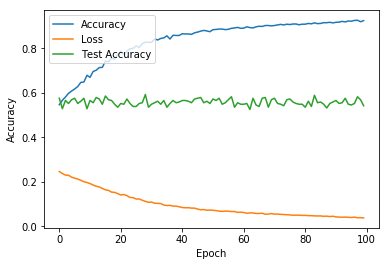

In [28]:
plt.plot(accuracy , label = "Accuracy")
plt.plot(loss , label = "Loss")
plt.plot(test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc='upper left')
plt.show()

In [20]:
import numpy

In [21]:
conv13 = torch.nn.Conv2d(in_channels = 1, out_channels=100, kernel_size= 3,stride= 128)

In [22]:
example = torch.Tensor(numpy.random.random([16, 1, 31, 128]))

In [23]:
conv13(example).shape

torch.Size([16, 100, 1, 1])